# Pima indian diabetes

#### This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.



In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
df=pd.read_csv('diabetese.csv',header=None,names=['preg','plas','pres','skin','test','mass','pedi','age','class'])

In [3]:
#size
df.size

6912

In [4]:
#first 5 rows
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [5]:
#df.info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#check null values
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

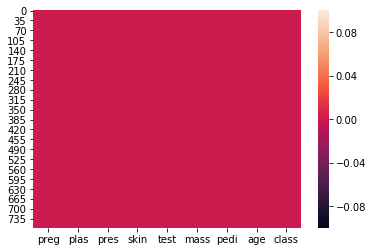

In [7]:
sns.heatmap(df.isnull())

dataset doesnt conrain  null values

In [8]:
#check datatypes
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#There are few attributes which can never be 0 like blood pressure,skin thickness and BMI
#Let's replace these 0's with mean
df["pres"]=df["pres"].replace(0,df["pres"].mean())
df["mass"]=df["mass"].replace(0,df["mass"].mean())
df["skin"]=df["skin"].replace(0,df["skin"].mean())

In [11]:
#Lets chcek other columns which contain 0
col_zero=list()
for col in df.columns:
    if df.loc[df[col]==0].empty:
        continue
    else:
        col_zero.append(col)
print(col_zero)

['preg', 'plas', 'test', 'class']


In [12]:
#so from above we knw glucose and insulin can't be 0
#lets replace them by mean
df["plas"]=df["plas"].replace(0,df["plas"].mean())
df["test"]=df["test"].replace(0,df["test"].mean())

we can see some outlier present in dataset which need to be treated

In [13]:
from scipy.stats import zscore
z_score=zscore(df)
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

(768, 9)
(720, 9)


In [14]:
#check skewness
df.skew()

preg     0.810366
plas     0.581294
pres     0.032681
skin     0.719754
test     2.053608
mass     0.332624
pedi     1.195487
age      1.071392
class    0.695339
dtype: float64

In [15]:
#we need to treat the skewness
import numpy as np
for index in df.drop(columns=["class"]).skew().index:
    if df.drop(columns=["class"]).skew().loc[index] > 0.55:
        df[index]=np.log1p(df[index])

In [16]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1.945910,5.003946,72.0,3.583519,4.391971,33.6,0.486738,3.931826,1
1,0.693147,4.454347,66.0,3.401197,4.391971,26.6,0.300845,3.465736,0
2,2.197225,5.214936,64.0,3.069747,4.391971,23.3,0.514021,3.496508,1
3,0.693147,4.499810,66.0,3.178054,4.553877,28.1,0.154436,3.091042,0
5,1.791759,4.762174,74.0,3.069747,4.391971,25.6,0.183155,3.433987,0


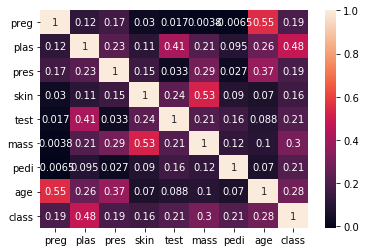

In [17]:
#corr
sns.heatmap(df.corr(),annot=True)

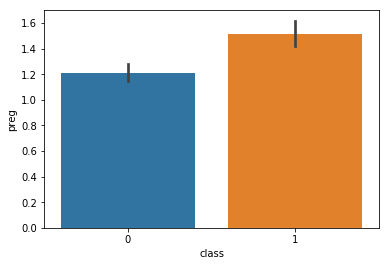

In [18]:
#eda
sns.barplot(x='class',y='preg',data=df)

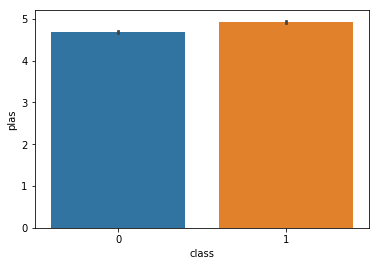

In [19]:
#eda
sns.barplot(x='class',y='plas',data=df)

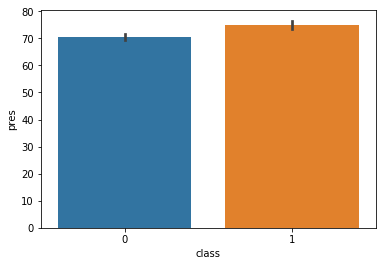

In [20]:
#eda
sns.barplot(x='class',y='pres',data=df)

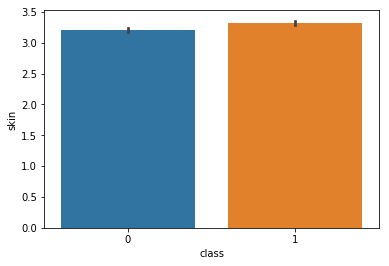

In [21]:
#eda
sns.barplot(x='class',y='skin',data=df)

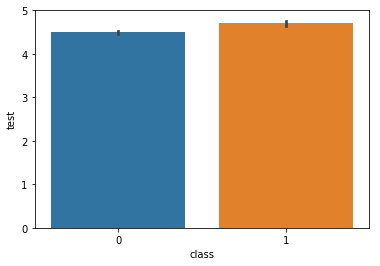

In [22]:
#eda
sns.barplot(x='class',y='test',data=df)

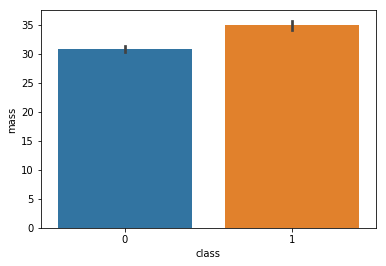

In [23]:
#eda
sns.barplot(x='class',y='mass',data=df)

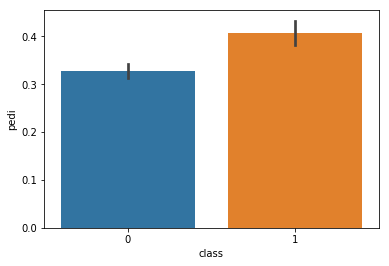

In [24]:
#eda
sns.barplot(x='class',y='pedi',data=df)

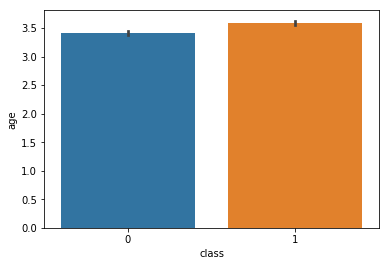

In [25]:
#eda
sns.barplot(x='class',y='age',data=df)

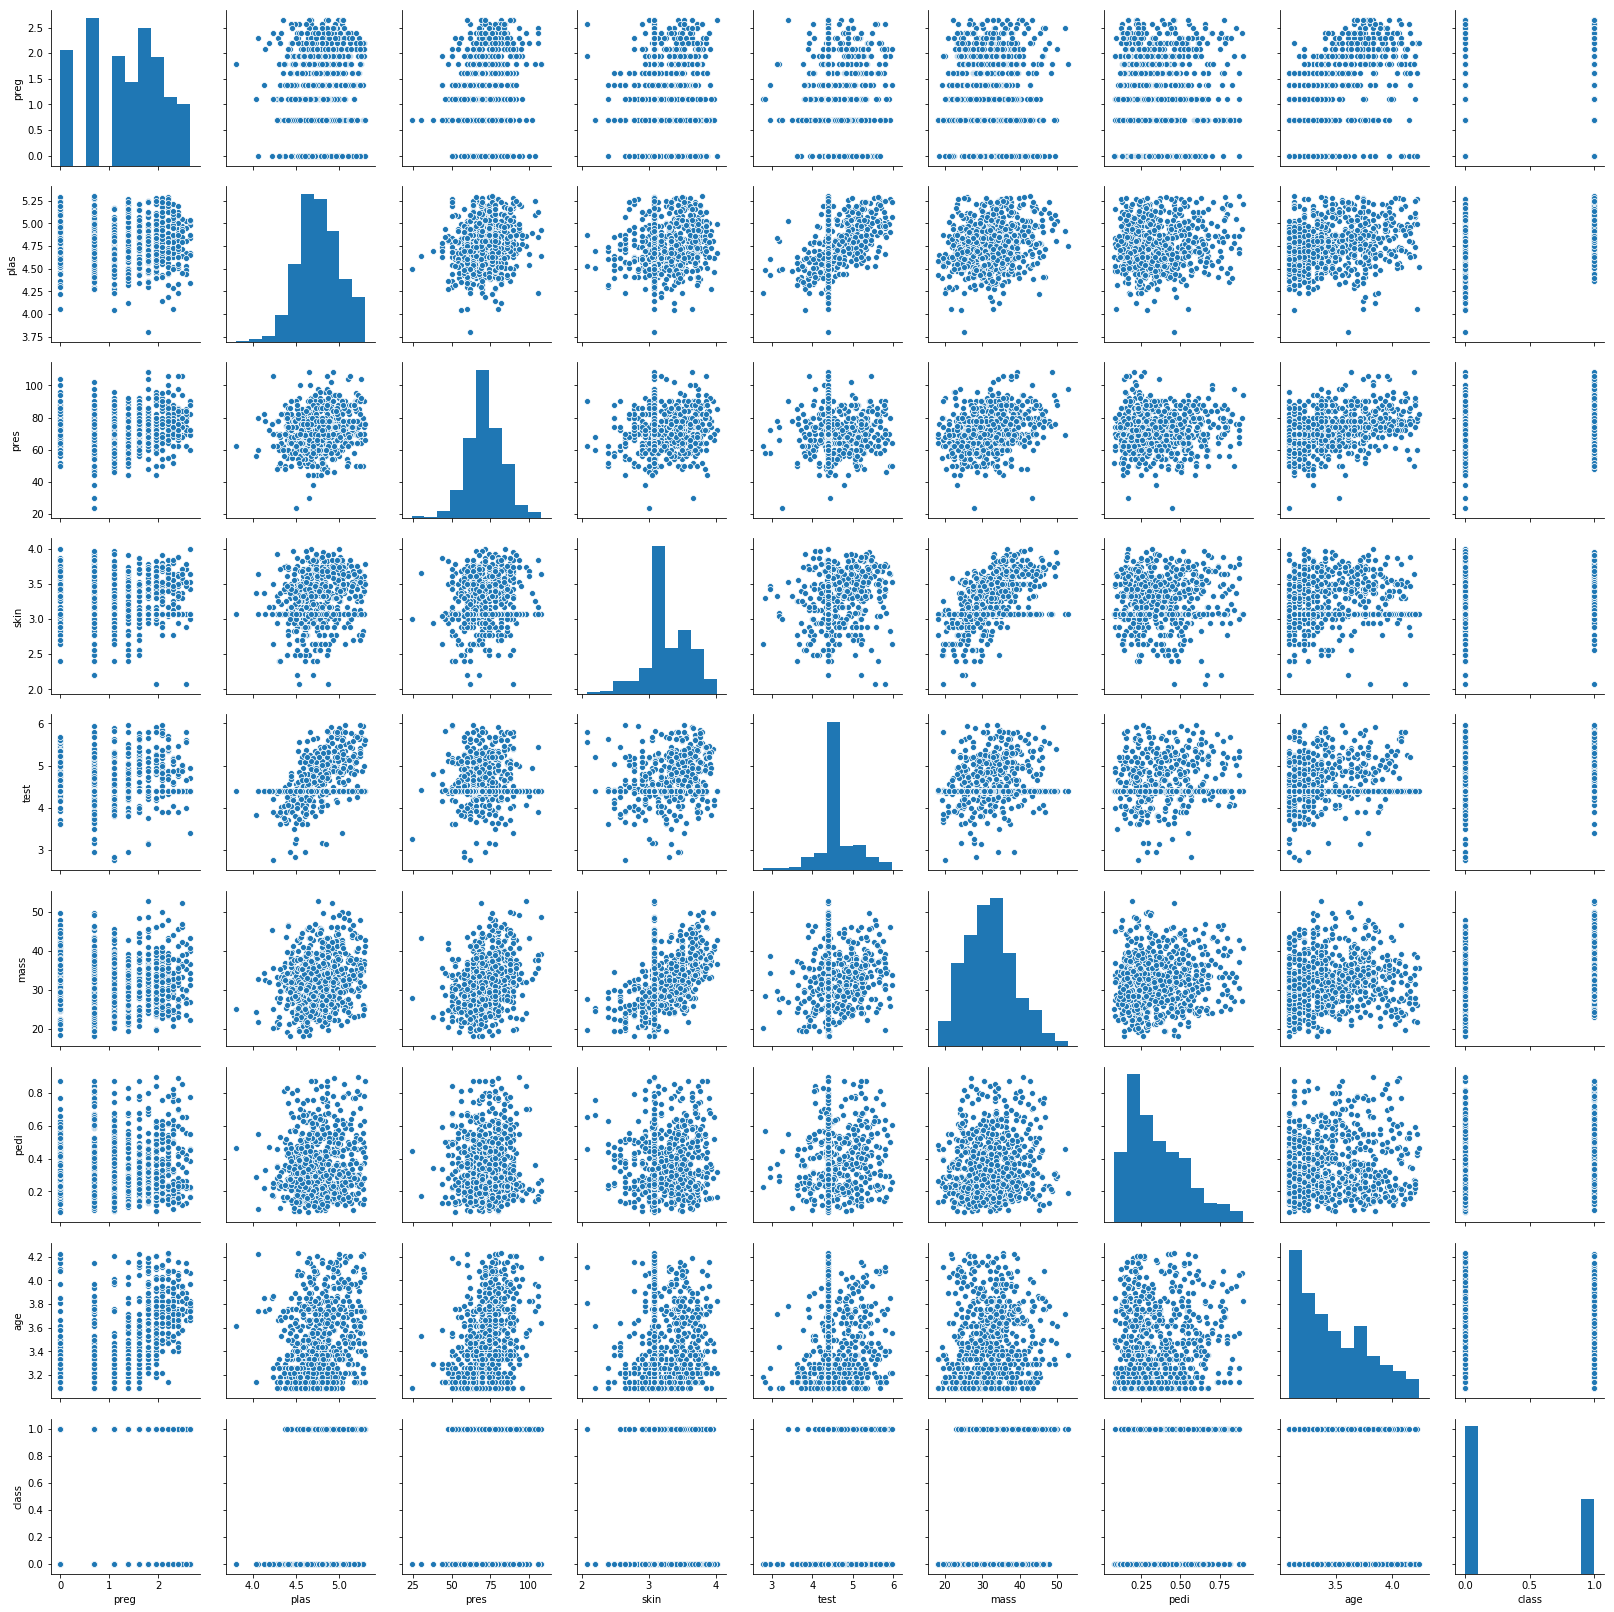

In [26]:
sns.pairplot(df)

In [27]:
#split the data

x = df.drop('class',axis=1)
y=df['class']

In [28]:
y.value_counts()

0    478
1    242
Name: class, dtype: int64

In [30]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [31]:
y.value_counts()

1    478
0    478
Name: class, dtype: int64

In [32]:
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [33]:
#Lets do standard scaling of the input variable
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print(clf ,"maximum f1_score is at random state :",rs," and it is :",maxf)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in model:
    maxf1_score(m,x,y)
    print(m)
    print("Mean f1 score for: ",m,cross_val_score(m,x,y,cv=5,scoring="f1").mean())
    print("standard deviation in f1 score for : ",m,cross_val_score(m,x,y,cv=5,scoring="f1").std())
    print(cross_val_score(m,x,y,cv=5,scoring="f1"))
    print('*************************************************************************************************')
    


LogisticRegression() maximum f1_score is at random state : 96  and it is : 0.8148148148148148
LogisticRegression()
Mean f1 score for:  LogisticRegression() 0.7584571105532163
standard deviation in f1 score for :  LogisticRegression() 0.04128865453342694
[0.7173913  0.74257426 0.74193548 0.83769634 0.75268817]
*************************************************************************************************
DecisionTreeClassifier() maximum f1_score is at random state : 62  and it is : 0.7961165048543689
DecisionTreeClassifier()
Mean f1 score for:  DecisionTreeClassifier() 0.7361278493332613
standard deviation in f1 score for :  DecisionTreeClassifier() 0.06613780149444802
[0.65517241 0.68085106 0.73796791 0.82474227 0.79365079]
*************************************************************************************************
SVC() maximum f1_score is at random state : 89  and it is : 0.855721393034826
SVC()
Mean f1 score for:  SVC() 0.8202569946009384
standard deviation in f1 score for : 

In [40]:
#Lets use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 500}

In [80]:

#Lets use random forest classifier
#Lets print auc roc score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
lg = RandomForestClassifier(n_estimators=500)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('f1_score:\n',f1_score(y_test,y_pred))

print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification_report:\n',classification_report(y_test,y_pred))




f1_score:
 0.84375
confusion_matrix:
 [[81 19]
 [11 81]]
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       100
           1       0.81      0.88      0.84        92

    accuracy                           0.84       192
   macro avg       0.85      0.85      0.84       192
weighted avg       0.85      0.84      0.84       192



In [82]:
print("Mean f1 score for random forest  classifier: ",cross_val_score(lg,x,y,cv=5,scoring="f1").mean())
print("standard deviation in f1 score for random forest classifier: ",cross_val_score(lg,x,y,cv=5,scoring="f1").std())
print(cross_val_score(lg,x,y,cv=5,scoring="f1"))

Mean f1 score for random forest  classifier:  0.8359863040076487
standard deviation in f1 score for random forest classifier:  0.06605156394307551
[0.80412371 0.76683938 0.79792746 0.92929293 0.87804878]


In [84]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
342,1,1
864,1,1
522,0,0
544,0,0
682,0,0


In [85]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(lg, 'diabetese.joblib') 


['diabetese.joblib']